In [3]:
import numpy as np
import pandas as pd

# Data from the image (xi: displacement in mm, yi: load in Newtons)
data = {
    "xi (mm)": [0.503, 0.669, 0.836, 1.002, 1.169, 1.336, 1.502, 1.669, 1.836, 2.002],
    "yi (N)": [18.6, 36.2, 53.6, 71.2, 89.7, 107.9, 125.9, 143.3, 160.6, 178.1]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate x_i^2, y_i^2, and x_i * y_i
df["xi^2"] = df["xi (mm)"] ** 2
df["yi^2"] = df["yi (N)"] ** 2
df["xi*yi"] = df["xi (mm)"] * df["yi (N)"]

# Data for sums
n = len(df)  # Number of data points
S_x = df["xi (mm)"].sum()
S_y = df["yi (N)"].sum()
S_xx = df["xi^2"].sum()
S_yy = df["yi^2"].sum()
S_xy = df["xi*yi"].sum()

# Calculate slope (m) and intercept (c)
m = (n * S_xy - S_x * S_y) / (n * S_xx - S_x**2)
c = (S_y - m * S_x) / n

# Uncertainty in slope (Um)
numerator = (1 / (n - 2)) * (n * S_yy - S_y**2 - m**2 * (n * S_xx - S_x**2))
denominator = n * S_xx - S_x**2
Um = np.sqrt(numerator / denominator)

# Uncertainty in intercept (Uc)
Uc = Um * np.sqrt(S_xx / n)

# Display the results
print(f"Slope (m): {m:.4f} ± {Um:.4f}")
print(f"Intercept (c): {c:.4f} ± {Uc:.4f}")


Slope (m): 106.8348 ± 0.3001
Intercept (c): -35.2899 ± 0.4023


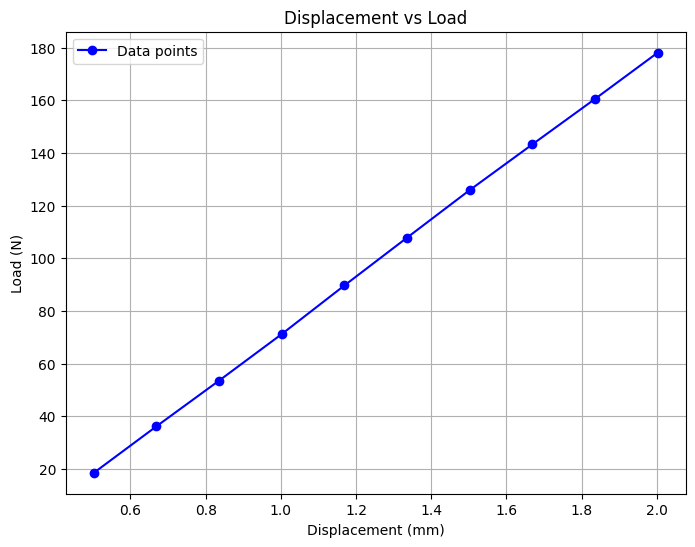

In [7]:
import matplotlib.pyplot as plt

# Data from the table
xi = [0.503, 0.669, 0.836, 1.002, 1.169, 1.336, 1.502, 1.669, 1.836, 2.002]
yi = [18.6, 36.2, 53.6, 71.2, 89.7, 107.9, 125.9, 143.3, 160.6, 178.1]

# Plot xi vs yi
plt.figure(figsize=(8,6))
plt.plot(xi, yi, 'o-', label="Data points", color="blue")
plt.title('Displacement vs Load')
plt.xlabel('Displacement (mm)')
plt.ylabel('Load (N)')
plt.grid(True)
plt.legend()
plt.show()
